In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import scipy.stats
from math import sqrt

## Overview of data

In [2]:
G = nx.read_graphml("london-graph.xml")

In [3]:
pos = nx.get_node_attributes(G, 'coords')
# pos

# {'Wembley Park': '(519316.5590174915, 186389.32981656672)',
#  'Kingsbury': '(519359.9688603217, 188721.22027255083)',
#  'Queensbury': '(518811.3613368616, 189760.50737704366)',
#  'Canons Park': '(518183.29968291725, 191257.26260848)',
#  'Stanmore': '(517580.4596464033, 192537.99948098673)',
#  'Stratford': '(538524.7855297636, 184373.34100822973)',

In [4]:
for name, coords in pos.items():
    temp = coords.split(',')
    x = float(temp[0][1:])
    y = float(temp[1][1:-1])
    pos[name] = (x, y)
    
# pos

# {'Wembley Park': (519316.5590174915, 186389.32981656672),
#  'Kingsbury': (519359.9688603217, 188721.22027255083),
#  'Queensbury': (518811.3613368616, 189760.50737704366),
#  'Canons Park': (518183.29968291725, 191257.26260848),
#  'Stanmore': (517580.4596464033, 192537.99948098673),
#  'Stratford': (538524.7855297636, 184373.34100822973),

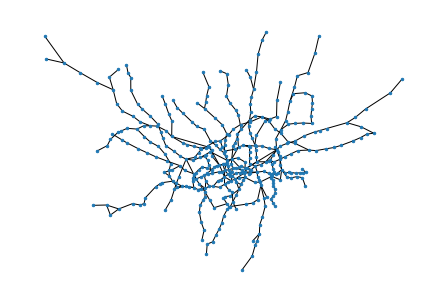

In [5]:
nx.draw(G,
        pos=pos,
        node_size=6)

In [6]:
# for node in G.nodes(data=True):
#     print(node)

# ('Wembley Park', {'coords': '(519316.5590174915, 186389.32981656672)'})
# ('Kingsbury', {'coords': '(519359.9688603217, 188721.22027255083)'})
# ('Queensbury', {'coords': '(518811.3613368616, 189760.50737704366)'})
# ('Canons Park', {'coords': '(518183.29968291725, 191257.26260848)'})
# ('Stanmore', {'coords': '(517580.4596464033, 192537.99948098673)'})

In [7]:
# for edge in G.edges(data=True):
#     print(edge)

# ('Wembley Park', 'Kingsbury', {'length': 2916.7715580506483, 'line_name': 'Jubilee', 'flows': 12356})
# ('Wembley Park', 'Neasden', {'length': 2353.1659381957816, 'line_name': 'Jubilee', 'flows': 6744})
# ('Wembley Park', 'Preston Road', {'length': 1419.7351657633037, 'line_name': 'Metropolitan', 'flows': 36601})
# ('Wembley Park', 'Finchley Road', {'length': 7266.37392749648, 'line_name': 'Metropolitan', 'flows': 55216})
# ('Kingsbury', 'Queensbury', {'length': 1245.9952343630068, 'line_name': 'Jubilee', 'flows': 9419})
# ('Queensbury', 'Canons Park', {'length': 1693.307343195774, 'line_name': 'Jubilee', 'flows': 6385})
# ('Canons Park', 'Stanmore', {'length': 1419.6694762456716, 'line_name': 'Jubilee', 'flows': 3624})
# ('Stratford', 'West Ham', {'length': 1673.509515131191, 'line_name': 'Jubilee', 'flows': 91801})
# ('Stratford', 'Mile End', {'length': 2805.0013918567865, 'line_name': 'Central', 'flows': 12010})

In [6]:
deg_df = pd.DataFrame(list(nx.degree(G)), columns=['Node', 'Degree'])
deg_df

,Node,Degree
0,Wembley Park,4
1,Kingsbury,2
2,Queensbury,2
3,Canons Park,2
4,Stanmore,1
...,...,...
396,Heathrow Terminal 5,1
397,Brixton,1
398,Vauxhall,2
399,Pimlico,2


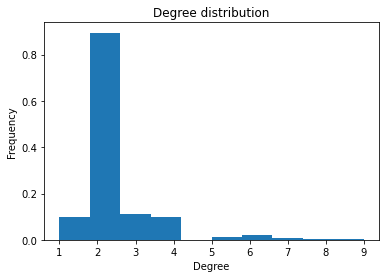

In [7]:
plt.hist(deg_df['Degree'], density=True)

plt.title('Degree distribution')
plt.ylabel("Frequency")
plt.xlabel("Degree")

plt.show()

## I.1. Centrality Measures
Select 3 centrality measures to characterise nodes, give their definitions and explain what they mean in the context of the underground. 

### Degree centrality
The degree of a node refers to the number of links connected to it.

In [6]:
# degree_dict = dict(nx.degree(G))
# degree_dict_desc = {k: v for k, v in sorted(degree_dict.items(), key=lambda x: x[1], reverse=True)}
# list(degree_dict_desc.items())[:15]

[('Stratford', 9),
 ('Bank and Monument', 8),
 ('Baker Street', 7),
 ("King's Cross St. Pancras", 7),
 ('West Ham', 6),
 ('Canning Town', 6),
 ('Waterloo', 6),
 ('Green Park', 6),
 ('Oxford Circus', 6),
 ('Liverpool Street', 6),
 ("Earl's Court", 6),
 ('Willesden Junction', 5),
 ('Shadwell', 5),
 ('Euston', 5),
 ('Turnham Green', 5)]

In [8]:
# normalised by dividing by the maximum possible degree in a simple graph, n-1, where n is the number of nodes in G.
degree_dict_norm = nx.degree_centrality(G)

deg_dict_desc = {k: v for k, v in sorted(degree_dict_norm.items(), key=lambda x: x[1], reverse=True)}
# list(deg_dict_desc.items())[:15]

degree_df = pd.DataFrame.from_dict(deg_dict_desc, orient='index')
degree_df.rename(columns={0: "degree centrality"}, inplace=True)
degree_df.head(10)

,degree centrality
Stratford,0.0225
Bank and Monument,0.0200
Baker Street,0.0175
King's Cross St. Pancras,0.0175
West Ham,0.0150
Canning Town,0.0150
Waterloo,0.0150
Green Park,0.0150
Oxford Circus,0.0150
Liverpool Street,0.0150


Discuss:

* Normalise so that we can compare the results before and after removing nodes as size of network changes
* Multiple nodes with same degree centrality, so the order of removal is random between these nodes
* This is also a limitation of using degree centrality to assess which stations are most important / the vulnerability of the underground. If 7 stations have the same degree centrality, but I only have resources to protect one, which one will I protect? choose randomly? But we know each station is quite different
* So degree centrality is not enough as an indicator of their accessibility/connectivity. We need to look at other measures to characterise the importance of each station


### Closeness centrality
A node with high closeness centrality is close to other nodes, as measured by the average length of the shortest paths to all other nodes. 

In nx, closeness centrality is normalized to (n-1)/(|G|-1)

If the graph is not completely connected, this algorithm computes the closeness centrality for each connected part separately scaled by that parts size.

In [9]:
closeness_dict = nx.closeness_centrality(G)

clo_dict_desc = {k: v for k, v in sorted(closeness_dict.items(), key=lambda x: x[1], reverse=True)}
# clo_list = list(clo_dict_desc.items())[:10]

# clo_list_round = []
# for i in clo_list:
#     print(i)
#     clo_list_round.append((i[0], round(i[1], 3)))

# clo_list_round

clo_df = pd.DataFrame.from_dict(clo_dict_desc, orient='index')
clo_df.rename(columns={0: "closeness centrality"}, inplace=True)
clo_df.head(10)

,closeness centrality
Green Park,0.114778
Bank and Monument,0.113572
King's Cross St. Pancras,0.113443
Westminster,0.112549
Waterloo,0.112265
Oxford Circus,0.111204
Bond Street,0.110988
Farringdon,0.110742
Angel,0.110742
Moorgate,0.110314


### Betweenness centrality
(of a node)
This is the fraction of shortest paths between all pairs that pass through this node. 

A node with high betweenness centrality is an important station that commuters pass through during their commute from their origin to destination. 

* The algorithm normalises the values by 2/((n-1)(n-2)) by default
* Edge weights are considered equal

In [10]:
bet_dict = nx.betweenness_centrality(G)

bet_dict_desc = {k: v for k, v in sorted(bet_dict.items(), key=lambda x: x[1], reverse=True)}
# bet_list = list(bet_dict_desc.items())[:15]

# bet_list_round = []
# for i in bet_list:
#     print(i)
#     bet_list_round.append((i[0], round(i[1], 3)))

# bet_list_round

bet_df = pd.DataFrame.from_dict(bet_dict_desc, orient='index')
bet_df.rename(columns={0: "betweenness centrality"}, inplace=True)
bet_df.head(15)

,betweenness centrality
Stratford,0.297846
Bank and Monument,0.290489
Liverpool Street,0.270807
King's Cross St. Pancras,0.255307
Waterloo,0.243921
Green Park,0.215835
Euston,0.208324
Westminster,0.203335
Baker Street,0.191568
Finchley Road,0.165085


Interestingly, Wembley Park and Finchley Road are the two stations with the longest distance between them.

In [11]:
max(dict(G.edges).items(), key=lambda x: x[1]['length'])

(('Wembley Park', 'Finchley Road'),
 {'length': 7266.37392749648, 'line_name': 'Metropolitan', 'flows': 55216})

In [15]:
# betweenness centrality with edge weights as the distance between stations
# weighted_bet_dict = nx.betweenness_centrality(G, weight='length')

# weighted_bet_dict_desc = {k: v for k, v in sorted(weighted_bet_dict.items(), key=lambda x: x[1], reverse=True)}
# list(weighted_bet_dict_desc.items())[:10]

[('Bank and Monument', 0.2212531328320802),
 ("King's Cross St. Pancras", 0.2091854636591479),
 ('Stratford', 0.18230576441102758),
 ('Oxford Circus', 0.169937343358396),
 ('Euston', 0.16591478696741854),
 ('Baker Street', 0.15225563909774437),
 ("Earl's Court", 0.143796992481203),
 ('Shadwell', 0.1394486215538847),
 ('Waterloo', 0.13042606516290728),
 ('South Kensington', 0.12951127819548872)]

## I.2. Impact Measures

In [12]:
orig_size = len(G.nodes)
orig_size

401

In [13]:
orig_diameter = nx.diameter(G)
orig_diameter

# diameter and avg path length are kind of similar
# diameter is the longest of all shortest paths (max distance)
# avg path length is the average distance between any 2 nodes

36

In [14]:
orig_avg_path_len = nx.average_shortest_path_length(G)
orig_avg_path_len

# this function divides by n(n-1)
# since the graph is undirected, the length from A to B is the same as the length from B to A

13.545997506234414

In [15]:
# number of components
orig_num_components = len(sorted(nx.connected_components(G), key=len, reverse=True))
orig_num_components

1

In [16]:
def get_impact(graph):
    num_components = len(sorted(nx.connected_components(graph), key=len, reverse=True))

    if num_components == 1:
        size = graph.number_of_nodes()

        avg_path_len = nx.average_shortest_path_length(graph)
    else:
        # if the graph is no longer connected,
        # use the largest component
        
        # Get the list of components:
        components = nx.connected_components(graph)

        # Use the max() command to find the largest one:
        largest_component = max(components, key=len)

        # Create a "subgraph" of the largest component
        largest_subgraph = graph.subgraph(largest_component)

        size = largest_subgraph.number_of_nodes()

        avg_path_len = nx.average_shortest_path_length(largest_subgraph)

    # Normalise these measures so that we can compare them 
    # before and after node removal, when the size of the graph changes. 
    norm_size = size / orig_size
    norm_av_path = avg_path_len / size  # size of giant component 

    return size, avg_path_len, num_components, norm_size, norm_av_path

## I.3. Node Removal

### Node removal (strategy A)

In [17]:
# get the names of the 10 stations with highest deg centrality
stations_max_deg = degree_df.index.tolist()[:10]
stations_max_deg

['Stratford',
 'Bank and Monument',
 'Baker Street',
 "King's Cross St. Pancras",
 'West Ham',
 'Canning Town',
 'Waterloo',
 'Green Park',
 'Oxford Circus',
 'Liverpool Street']

In [18]:
stations_max_clo = clo_df.index.tolist()[:10]
stations_max_clo

['Green Park',
 'Bank and Monument',
 "King's Cross St. Pancras",
 'Westminster',
 'Waterloo',
 'Oxford Circus',
 'Bond Street',
 'Farringdon',
 'Angel',
 'Moorgate']

In [19]:
stations_max_bet = bet_df.index.tolist()[:10]
stations_max_bet

['Stratford',
 'Bank and Monument',
 'Liverpool Street',
 "King's Cross St. Pancras",
 'Waterloo',
 'Green Park',
 'Euston',
 'Westminster',
 'Baker Street',
 'Finchley Road']

In [20]:
# remove according to their initial ranking
# and evaluate using impact measures at each step

def node_removal_A(graph, stations_to_remove):
    results = {}
    results['Original'] = [orig_size, orig_avg_path_len, orig_num_components, 1, orig_avg_path_len/orig_size]

    for station in stations_to_remove:
        graph.remove_node(station)
        size, avg_path_len, num_components, norm_size, norm_av_path = get_impact(graph)
        results[station] = [size, avg_path_len, num_components, norm_size, norm_av_path]

    return results

#### Degree centrality

In [21]:
Ga = G.copy()
deg_A = pd.DataFrame.from_dict(node_removal_A(Ga, stations_max_deg), orient='index',
                               columns=['Giant component size', 'Avg path length',
                                        'Num components', 'norm_size', 'norm_av_path'])
deg_A.reset_index(inplace=True)
deg_A.rename(columns={"index": "Station"}, inplace=True)
deg_A

,Station,Giant component size,Avg path length,Num components,norm_size,norm_av_path
0,Original,401,13.545998,1,1.000000,0.033781
1,Stratford,379,14.496447,3,0.945137,0.038249
2,Bank and Monument,378,14.872497,3,0.942643,0.039345
3,Baker Street,377,15.686438,3,0.940150,0.041609
4,King's Cross St. Pancras,374,17.013376,4,0.932668,0.045490
5,West Ham,371,17.853836,5,0.925187,0.048124
6,Canning Town,356,17.693353,8,0.887781,0.049700
7,Waterloo,355,18.139508,8,0.885287,0.051097
8,Green Park,354,18.344521,8,0.882793,0.051821
9,Oxford Circus,352,18.419160,9,0.877805,0.052327


#### Closeness centrality

In [22]:
Gb = G.copy()
clo_A = pd.DataFrame.from_dict(node_removal_A(Gb, stations_max_clo), orient='index',
                               columns=['Giant component size', 'Avg path length', 
                                        'Num components', 'norm_size', 'norm_av_path'])
clo_A.reset_index(inplace=True)
clo_A.rename(columns={"index": "Station"}, inplace=True)
clo_A

,Station,Giant component size,Avg path length,Num components,norm_size,norm_av_path
0,Original,401,13.545998,1,1.000000,0.033781
1,Green Park,400,13.824536,1,0.997506,0.034561
2,Bank and Monument,399,14.382728,1,0.995012,0.036047
3,King's Cross St. Pancras,398,15.983773,1,0.992519,0.040160
4,Westminster,397,16.080248,1,0.990025,0.040504
5,Waterloo,396,16.855722,1,0.987531,0.042565
6,Oxford Circus,395,17.431832,1,0.985037,0.044131
7,Bond Street,394,17.464267,1,0.982544,0.044326
8,Farringdon,393,17.462494,1,0.980050,0.044434
9,Angel,392,17.460528,1,0.977556,0.044542


#### Betweenness centrality

In [23]:
Gc = G.copy()
bet_A = pd.DataFrame.from_dict(node_removal_A(Gc, stations_max_bet), orient='index',
                               columns=['Giant component size', 'Avg path length',
                                        'Num components', 'norm_size', 'norm_av_path'])
bet_A.reset_index(inplace=True)
bet_A.rename(columns={"index": "Station"}, inplace=True)
bet_A

,Station,Giant component size,Avg path length,Num components,norm_size,norm_av_path
0,Original,401,13.545998,1,1.000000,0.033781
1,Stratford,379,14.496447,3,0.945137,0.038249
2,Bank and Monument,378,14.872497,3,0.942643,0.039345
3,Liverpool Street,377,15.031209,3,0.940150,0.039871
4,King's Cross St. Pancras,371,16.030742,4,0.925187,0.043210
5,Waterloo,370,16.756742,4,0.922693,0.045288
6,Green Park,369,17.180865,4,0.920200,0.046561
7,Euston,346,16.807372,5,0.862843,0.048576
8,Westminster,345,16.975059,5,0.860349,0.049203
9,Baker Street,342,17.586339,6,0.852868,0.051422


### Node removal (strategy B)

In [24]:
def node_removal_B(graph, first_station, centrality_measure):
    results = {}
    results['Original'] = [orig_size, orig_avg_path_len, orig_num_components, 1, orig_avg_path_len/orig_size]

    graph.remove_node(first_station)
    size, avg_path_len, num_components, norm_size, norm_av_path = get_impact(graph)
    results[first_station] = [size, avg_path_len, num_components, norm_size, norm_av_path]

    for i in range(2, 11):  # 2 to 10
        if centrality_measure == "degree":
            centrality_dict = nx.degree_centrality(graph)

        elif centrality_measure == "closeness":
            centrality_dict = nx.closeness_centrality(graph)
            # If the graph has > 1 connected component,
            # scale by the fraction of nodes reachable.
            # This gives the Wasserman and Faust improved formula.

        elif centrality_measure == "betweenness":
            centrality_dict = nx.betweenness_centrality(graph)
            # what happens if the graph is disconnected?

        next_node = max(centrality_dict, key=centrality_dict.get)
        graph.remove_node(next_node)
        size, avg_path_len, num_components, norm_size, norm_av_path = get_impact(graph)
        results[next_node] = [size, avg_path_len, num_components, norm_size, norm_av_path]

    return results

#### Degree centrality

In [25]:
Gd = G.copy()
deg_B = pd.DataFrame.from_dict(node_removal_B(Gd, "Stratford", "degree"), orient='index',
                               columns=['Giant component size', 'Avg path length', 
                                        'Num components', 'norm_size', 'norm_av_path'])
deg_B.reset_index(inplace=True)
deg_B.rename(columns={'index': 'Station'}, inplace=True)
deg_B

,Station,Giant component size,Avg path length,Num components,norm_size,norm_av_path
0,Original,401,13.545998,1,1.000000,0.033781
1,Stratford,379,14.496447,3,0.945137,0.038249
2,Bank and Monument,378,14.872497,3,0.942643,0.039345
3,Baker Street,377,15.686438,3,0.940150,0.041609
4,King's Cross St. Pancras,374,17.013376,4,0.932668,0.045490
5,Canning Town,360,17.376076,6,0.897756,0.048267
6,Green Park,359,17.531100,6,0.895262,0.048833
7,Earl's Court,358,17.894731,6,0.892768,0.049985
8,Waterloo,357,18.493501,6,0.890274,0.051803
9,Oxford Circus,355,18.574966,7,0.885287,0.052324


#### Closeness centrality

In [26]:
Ge = G.copy()
clo_B = pd.DataFrame.from_dict(node_removal_B(Ge, "Green Park", "closeness"), orient='index',
                               columns=['Giant component size', 'Avg path length',
                                        'Num components', 'norm_size', 'norm_av_path'])
clo_B.reset_index(inplace=True)
clo_B.rename(columns={'index': 'Station'}, inplace=True)
clo_B

,Station,Giant component size,Avg path length,Num components,norm_size,norm_av_path
0,Original,401,13.545998,1,1.000000,0.033781
1,Green Park,400,13.824536,1,0.997506,0.034561
2,King's Cross St. Pancras,399,14.658480,1,0.995012,0.036738
3,Waterloo,398,15.114818,1,0.992519,0.037977
4,Bank and Monument,397,16.702427,1,0.990025,0.042072
5,West Hampstead,396,18.974696,1,0.987531,0.047916
6,Canada Water,226,13.978014,2,0.563591,0.061850
7,Stratford,226,13.978014,4,0.563591,0.061850
8,Earl's Court,225,14.729722,4,0.561097,0.065465
9,Shepherd's Bush,195,14.747608,5,0.486284,0.075629


#### Betweenness centrality

In [27]:
Gf = G.copy()
bet_B = pd.DataFrame.from_dict(node_removal_B(Gf, "Stratford", "betweenness"), orient='index',
                               columns=['Giant component size', 'Avg path length',
                                        'Num components', 'norm_size', 'norm_av_path'])
bet_B.reset_index(inplace=True)
bet_B.rename(columns={'index': 'Station'}, inplace=True)
bet_B

,Station,Giant component size,Avg path length,Num components,norm_size,norm_av_path
0,Original,401,13.545998,1,1.000000,0.033781
1,Stratford,379,14.496447,3,0.945137,0.038249
2,King's Cross St. Pancras,378,15.310134,3,0.942643,0.040503
3,Waterloo,377,15.795939,3,0.940150,0.041899
4,Bank and Monument,376,16.789631,3,0.937656,0.044653
5,Canada Water,375,19.029234,3,0.935162,0.050745
6,West Hampstead,227,13.462360,4,0.566085,0.059306
7,Earl's Court,226,14.206450,4,0.563591,0.062860
8,Shepherd's Bush,196,13.792046,5,0.488778,0.070368
9,Euston,173,13.821885,6,0.431421,0.079895


### Line plots of results

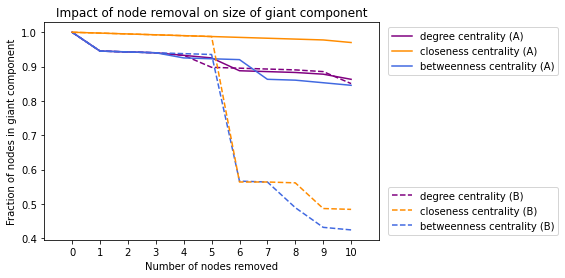

In [29]:
fig, ax = plt.subplots()

line_deg_A, = ax.plot(deg_A.index.values, deg_A['norm_size'], label="degree centrality (A)", color='purple')
line_deg_B, = ax.plot(deg_A.index.values, deg_B['norm_size'], label="degree centrality (B)", color='purple', linestyle='--')

line_bet_A, = ax.plot(deg_A.index.values, bet_A["norm_size"], label="betweenness centrality (A)", color='royalblue')
line_bet_B, = ax.plot(deg_A.index.values, bet_B["norm_size"], label="betweenness centrality (B)", color='royalblue', linestyle='--')

line_clo_A, = ax.plot(deg_A.index.values, clo_A["norm_size"], label="closeness centrality (A)", color='darkorange')
line_clo_B, = ax.plot(deg_A.index.values, clo_B["norm_size"], label="closeness centrality (B)", color='darkorange', linestyle='--')

ax.set(xlim=(-1, 11), xticks=np.arange(0, 11))

# Create a legend for Strategy B.
first_legend = ax.legend(handles=[line_deg_B, line_clo_B, line_bet_B], loc='lower right', bbox_to_anchor=(1.55, 0))

# Add the legend manually to the Axes.
ax.add_artist(first_legend)

# Create another legend for Strategy A.
ax.legend(handles=[line_deg_A, line_clo_A, line_bet_A], loc='upper right', bbox_to_anchor=(1.55, 1))

plt.title(label="Impact of node removal on size of giant component")
ax.set_xlabel("Number of nodes removed")
ax.set_ylabel("Fraction of nodes in giant component")

plt.show()

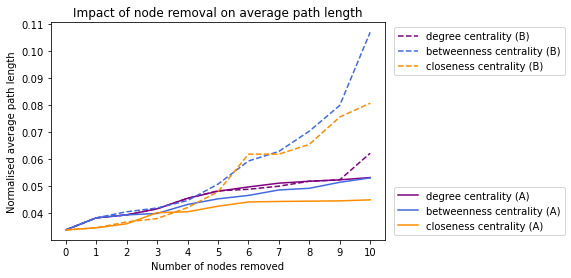

In [31]:
fig, ax = plt.subplots()

line_deg_A, = ax.plot(deg_A.index.values, deg_A['norm_av_path'], label="degree centrality (A)", color='purple')
line_deg_B, = ax.plot(deg_A.index.values, deg_B['norm_av_path'], label="degree centrality (B)", color='purple', linestyle='--')

line_bet_A, = ax.plot(deg_A.index.values, bet_A["norm_av_path"], label="betweenness centrality (A)", color='royalblue')
line_bet_B, = ax.plot(deg_A.index.values, bet_B["norm_av_path"], label="betweenness centrality (B)", color='royalblue', linestyle='--')

line_clo_A, = ax.plot(deg_A.index.values, clo_A["norm_av_path"], label="closeness centrality (A)", color='darkorange')
line_clo_B, = ax.plot(deg_A.index.values, clo_B["norm_av_path"], label="closeness centrality (B)", color='darkorange', linestyle='--')

ax.set(xlim=(-0.5, 10.5), xticks=np.arange(0, 11))

# Create a legend for Strategy B.
first_legend = ax.legend(handles=[line_deg_B, line_bet_B, line_clo_B], loc='upper right', bbox_to_anchor=(1.55, 1))

# Add the legend manually to the Axes.
ax.add_artist(first_legend)

# Create another legend for Strategy A.
ax.legend(handles=[line_deg_A, line_bet_A, line_clo_A], loc='lower right', bbox_to_anchor=(1.55, 0))

plt.title(label="Impact of node removal on average path length")
ax.set_xlabel("Number of nodes removed")
ax.set_ylabel("Normalised average path length")

plt.show()

## II.1. Weighted betweenness centrality

Weights are used to calculate weighted shortest paths, so they are interpreted as distances.

Invert the weights (flows) between stations; the higher the flows the closer the two stations are.

To avoid a division by zero when some edges have no flows, give these edges a large weight e.g. 10000

By incorporating flows of people using inv flows, the shortest path is the path with the most commuters.

Stations with high weighted betweenness centrality are stations that many people pass through as they commute from one station to another.

In [32]:
# find out which edges have no flows
no_flows = [(u, v, d) for u, v, d in G.edges(data=True) 
            if d['flows'] == 0]
no_flows

[('Wandsworth Road',
  'Battersea Park',
  {'length': 1168.489261461717, 'line_name': 'London Overground', 'flows': 0}),
 ('Kennington',
  'Nine Elms',
  {'length': 2030.6218428562188, 'line_name': 'Northern', 'flows': 0}),
 ('Battersea Power Station',
  'Nine Elms',
  {'length': 1073.4653619699277, 'line_name': 'Northern', 'flows': 0})]

Nine Elms and Battersea Power Station only opened in September 2021.

In [33]:
inv_weights = {}

for start, end, weight in G.edges(data='flows'):
    try:
        inv_weights[(start, end)] = round(1/weight, 7)
    except:
        inv_weights[(start, end)] = 10000

# Let us add the inverted weight as an attribute to the edges in the graph
nx.set_edge_attributes(G, inv_weights, 'inv_flows')

In [34]:
# betweenness centrality with edge weights as the inverse flows between stations
bet_dict_flows = nx.betweenness_centrality(G, weight='inv_flows')

flow_bet_dict_desc = {k: v for k, v in sorted(bet_dict_flows.items(), key=lambda x: x[1], reverse=True)}
# flow_bet_list = list(flow_bet_dict_desc.items())[:10]

# flow_bet_list_round = []
# for i in flow_bet_list:
#     print(i)
#     flow_bet_list_round.append((i[0], round(i[1], 3)))

# flow_bet_list_round

flow_bet_df = pd.DataFrame.from_dict(flow_bet_dict_desc, orient='index')
flow_bet_df.rename(columns={0: "weighted betweenness centrality"}, inplace=True)
flow_bet_df.head(10)

,weighted betweenness centrality
Green Park,0.572556
Bank and Monument,0.505288
Waterloo,0.416429
Westminster,0.381366
Liverpool Street,0.336817
Stratford,0.331291
Bond Street,0.291830
Euston,0.284236
Oxford Circus,0.270764
Warren Street,0.254286


## II.2. New impact measure

(Size of the largest component cannot be adjusted for a weighted network.)

Issues with avg path length:

* requires computing the shortest path between all pairs of stations
* but some edges have 0 flows, which i gave an arbitrary value like 1000 when I inverted the flows
* some of the shortest paths still pass through these edges, because there is no other alternative
* this skews avg path length
* varies with the size of the graph, so need to normalise again (although this time we only remove 2 nodes)

Weighted diameter:

* the maximum number of commuters on a path from A to B
* can be interpreted as the max number of people who will be affected?

In [35]:
def get_new_impact(graph):
    num_components = len(sorted(nx.connected_components(graph), key=len, reverse=True))
    total_flows = 0

    orig_flows = 0
    for edge in list(G.edges(data='flows')):
        orig_flows += edge[2]

    if num_components == 1:
        size = graph.number_of_nodes()

        for edge in list(graph.edges(data='flows')):
            total_flows += edge[2]

    else:
        # if the graph is no longer connected,
        # use the largest component

        # Get the list of components:
        components = nx.connected_components(graph)

        # Use the max() command to find the largest one:
        largest_component = max(components, key=len)

        # Create a "subgraph" of the largest component
        largest_subgraph = graph.subgraph(largest_component)

        size = largest_subgraph.number_of_nodes()

        # total flows -- something like max capacity?
        for edge in list(largest_subgraph.edges(data='flows')):
            total_flows += edge[2]

#         spl = nx.shortest_path_length(largest_subgraph, weight='inv_flows')
#         all_spl = dict(spl)

#         # get the max flows from n to all other stations
#         for n in largest_subgraph.nodes():
#             max_flows = min(list(all_spl[n].values())[1:])  # exclude the first value which is the distance to itself
#             e[n] = 1/max_flows

#         # diameter
#         weighted_diam = nx.diameter(largest_subgraph, e=e)

    norm_flows = total_flows / orig_flows

    return size/orig_size, norm_flows

## II.3. Node removal

In [36]:
def node_removal_new(graph, node_to_remove):
    results = {}
    norm_size, norm_flows = get_new_impact(graph)
    results['Original'] = [norm_size, norm_flows]

    graph.remove_node(node_to_remove)
    norm_size, norm_flows = get_new_impact(graph)
    results[node_to_remove] = [norm_size, norm_flows]

    return results

### Betweenness centrality

In [37]:
G1 = G.copy()
bet_new = pd.DataFrame.from_dict(node_removal_new(G1, "Stratford"), orient='index',
                                 columns=['norm_size', 'norm_flows'])
bet_new.reset_index(inplace=True)
bet_new.rename(columns={'index': 'Station'}, inplace=True)
bet_new

,Station,norm_size,norm_flows
0,Original,1.000000,1.000000
1,Stratford,0.945137,0.940591


### Weighted betweenness centrality

In [38]:
G2 = G.copy()
w_bet_new = pd.DataFrame.from_dict(node_removal_new(G2, "Green Park"), orient='index',
                                   columns=['norm_size', 'norm_flows'])
w_bet_new.reset_index(inplace=True)
w_bet_new.rename(columns={'index': 'Station'}, inplace=True)
w_bet_new

,Station,norm_size,norm_flows
0,Original,1.000000,1.000000
1,Green Park,0.997506,0.936698


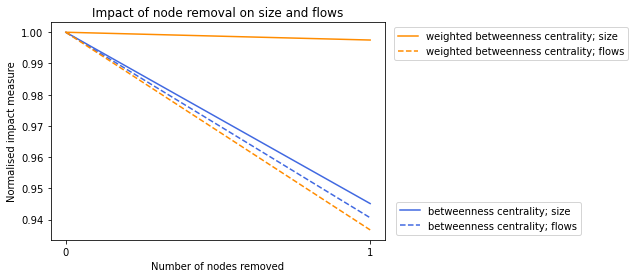

In [39]:
fig, ax = plt.subplots()

bet_flows, = ax.plot(bet_new.index.values, bet_new["norm_flows"], label="betweenness centrality; flows", color='royalblue', linestyle='--')
bet_size, = ax.plot(bet_new.index.values, bet_new["norm_size"], label="betweenness centrality; size", color='royalblue')

w_bet_flows, = ax.plot(bet_new.index.values, w_bet_new["norm_flows"], label="weighted betweenness centrality; flows", color='darkorange', linestyle='--')
w_bet_size, = ax.plot(bet_new.index.values, w_bet_new["norm_size"], label="weighted betweenness centrality; size", color='darkorange')

ax.set(xticks=np.arange(0, 2))

first_legend = ax.legend(handles=[w_bet_size, w_bet_flows], loc='upper right', bbox_to_anchor=(1.74, 1))

# Add the legend manually to the Axes.
ax.add_artist(first_legend)

ax.legend(handles=[bet_size, bet_flows], loc='lower right', bbox_to_anchor=(1.6, 0))

plt.title(label="Impact of node removal on size and flows")
ax.set_xlabel("Number of nodes removed")
ax.set_ylabel("Normalised impact measure")

plt.show()

## III.2. Production-constrained model

\begin{equation} \tag{1}
T_{ij} = A_i O_i D_j^\gamma d_{ij}^{-\beta}
\end{equation}

where

\begin{equation} \tag{2}
O_i = \sum_j T_{ij}
\end{equation}

and

\begin{equation} \tag{3}
A_i = \frac{1}{\sum_j D_j^\gamma d_{ij}^{-\beta}}
\end{equation}

re-specified as a Poisson regression model

\begin{equation} \tag{4}
\lambda_{ij} = \exp (\alpha_i + \gamma \ln D_j - \beta \ln d_{ij})
\end{equation}

In [40]:
df = pd.read_csv('london_flows.csv')
df

,station_origin,station_destination,flows,population,jobs,distance
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097
1,Abbey Road,Beckton,1,599,442,8510.121774
2,Abbey Road,Blackwall,3,599,665,3775.448872
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220
4,Abbey Road,Canning Town,37,599,15428,2228.923167
...,...,...,...,...,...,...
61469,Woolwich Arsenal,Tower Gateway,127,7892,3342,13401.795549
61470,Woolwich Arsenal,West Ham,608,7892,5487,8701.454361
61471,Woolwich Arsenal,West India Quay,6,7892,400,9536.720451
61472,Woolwich Arsenal,West Silvertown,81,7892,893,5355.248554


If Battersea Park is the origin station, population = 0. 

If Battersea Park is the destination station, jobs = 0. 

It is not meaningful to include Battersea Park in our analysis because the population and jobs estimates are inaccurate and most likely due to the way the flow data was processed. So I will remove these O-D pairs. 

I will also remove O-D pairs that start and end at the same station. 

In [41]:
# df.loc[df['population'] == 0]
# df.loc[df['jobs'] == 0]
# df.loc[df['distance'] == 0]

df = df.loc[(df['population'] > 0) & (df['jobs'] > 0) & (df['distance'] > 0)].copy()
df.reset_index(drop=True, inplace=True)

In [42]:
def log_function(x):
    return np.log(x)


for var in ['population', 'jobs', 'distance']:
    df[f"log_{var}"] = df[f"{var}"].apply(log_function)

df

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,6.395262,11.271478,9.003504
1,Abbey Road,Beckton,1,599,442,8510.121774,6.395262,6.091310,9.049012
2,Abbey Road,Blackwall,3,599,665,3775.448872,6.395262,6.499787,8.236275
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,6.395262,10.981421,8.534348
4,Abbey Road,Canning Town,37,599,15428,2228.923167,6.395262,9.643939,7.709274
...,...,...,...,...,...,...,...,...,...
61408,Woolwich Arsenal,Tower Gateway,127,7892,3342,13401.795549,8.973605,8.114325,9.503144
61409,Woolwich Arsenal,West Ham,608,7892,5487,8701.454361,8.973605,8.610137,9.071245
61410,Woolwich Arsenal,West India Quay,6,7892,400,9536.720451,8.973605,5.991465,9.162905
61411,Woolwich Arsenal,West Silvertown,81,7892,893,5355.248554,8.973605,6.794587,8.585832


In [43]:
flow_matrix = pd.pivot_table(df, values="flows", index="station_origin",
                             columns="station_destination", aggfunc=np.sum, margins=True)
flow_matrix.fillna(0, inplace=True)
flow_matrix = flow_matrix.astype('int32')
flow_matrix

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,32,599
Acton Central,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1224
Acton Town,0,0,0,3,17,0,35,0,0,11,...,77,3,6,9,0,0,0,0,0,3745
Aldgate,0,0,0,0,0,0,0,0,0,17,...,0,0,4,8,0,0,0,0,0,2886
Aldgate East,0,0,2,0,0,0,0,0,0,20,...,24,0,0,12,0,1,0,1,0,3172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,0,0,2,5,47,0,0,0,0,22,...,2,0,1,0,0,0,0,0,0,4868
Woodgrange Park,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,530
Woodside Park,0,0,1,26,11,0,0,0,0,59,...,0,0,0,0,0,0,0,0,0,3093


### Negative exponential model

In [44]:
# create the formula (the "-1" indicates no intercept in the regression model).
formula = 'flows ~ station_origin + log_jobs + distance - 1'

# run a production constrained sim
prodSim = smf.glm(formula=formula, data=df, family=sm.families.Poisson()).fit()

# let's have a look at it's summary
print(prodSim.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                61413
Model:                            GLM   Df Residuals:                    61013
Model Family:                 Poisson   Df Model:                          399
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -9.0994e+05
Date:                Tue, 03 May 2022   Deviance:                   1.6477e+06
Time:                        07:57:03   Pearson chi2:                 2.40e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [45]:
coefs = pd.DataFrame(prodSim.params)
coefs.reset_index(inplace=True)

In [46]:
coefs.rename(columns={0: "alpha_i", "index": "coef"}, inplace=True)

to_repl = ["(station_origin)", "\[", "\]"]

for x in to_repl:
    coefs["coef"] = coefs["coef"].str.replace(x, "", regex=True)

coefs

,coef,alpha_i
0,Abbey Road,-2.914322
1,Acton Central,-1.162092
2,Acton Town,-1.613081
3,Aldgate,-2.943047
4,Aldgate East,-2.854752
...,...,...
395,Woodgrange Park,-0.896422
396,Woodside Park,-1.149110
397,Woolwich Arsenal,0.518041
398,log_jobs,0.755222


In [47]:
# once you have done this you can join them back into the dataframes
df = df.merge(coefs, left_on="station_origin", right_on="coef", how="left")
df.drop(columns=["coef"], inplace=True)
df

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,alpha_i
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,6.395262,11.271478,9.003504,-2.914322
1,Abbey Road,Beckton,1,599,442,8510.121774,6.395262,6.091310,9.049012,-2.914322
2,Abbey Road,Blackwall,3,599,665,3775.448872,6.395262,6.499787,8.236275,-2.914322
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,6.395262,10.981421,8.534348,-2.914322
4,Abbey Road,Canning Town,37,599,15428,2228.923167,6.395262,9.643939,7.709274,-2.914322
...,...,...,...,...,...,...,...,...,...,...
61408,Woolwich Arsenal,Tower Gateway,127,7892,3342,13401.795549,8.973605,8.114325,9.503144,0.518041
61409,Woolwich Arsenal,West Ham,608,7892,5487,8701.454361,8.973605,8.610137,9.071245,0.518041
61410,Woolwich Arsenal,West India Quay,6,7892,400,9536.720451,8.973605,5.991465,9.162905,0.518041
61411,Woolwich Arsenal,West Silvertown,81,7892,893,5355.248554,8.973605,6.794587,8.585832,0.518041


In [48]:
alpha_i = prodSim.params[0:398]
gamma = prodSim.params[398]
beta = -prodSim.params[399]

In [49]:
# generate estimates
df["prodsimest1"] = np.round(prodSim.mu, 0)
df["prodsimest1"] = df["prodsimest1"].astype(int)

# df["prodsimest1b"] = np.exp(df["alpha_i"] + gamma*df["log_jobs"] - beta*df["distance"])
# df["prodsimest1b"] = np.round(df['prodsimest1b'])
# df["prodsimest1b"] = df["prodsimest1b"].astype(int)

# df

In [52]:
predicted_flows1 = df.pivot_table(values="prodsimest1", index="station_origin",
                                  columns="station_destination", aggfunc=np.sum, margins=True)
predicted_flows1.fillna(0, inplace=True)
predicted_flows1

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,595
Acton Central,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1226
Acton Town,0.0,0.0,0.0,13.0,13.0,0.0,14.0,0.0,0.0,16.0,...,13.0,3.0,2.0,20.0,0.0,0.0,0.0,1.0,0.0,3744
Aldgate,0.0,0.0,1.0,0.0,37.0,0.0,0.0,0.0,0.0,27.0,...,2.0,0.0,2.0,2.0,0.0,1.0,0.0,1.0,0.0,2885
Aldgate East,0.0,0.0,1.0,40.0,0.0,0.0,0.0,0.0,0.0,29.0,...,2.0,0.0,3.0,2.0,0.0,1.0,0.0,1.0,0.0,3160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,0.0,0.0,1.0,41.0,52.0,0.0,0.0,0.0,0.0,30.0,...,2.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,4867
Woodgrange Park,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,532
Woodside Park,0.0,0.0,2.0,19.0,19.0,0.0,0.0,0.0,0.0,32.0,...,3.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3100


In [51]:
# check against original
flow_matrix

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,32,599
Acton Central,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1224
Acton Town,0,0,0,3,17,0,35,0,0,11,...,77,3,6,9,0,0,0,0,0,3745
Aldgate,0,0,0,0,0,0,0,0,0,17,...,0,0,4,8,0,0,0,0,0,2886
Aldgate East,0,0,2,0,0,0,0,0,0,20,...,24,0,0,12,0,1,0,1,0,3172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,0,0,2,5,47,0,0,0,0,22,...,2,0,1,0,0,0,0,0,0,4868
Woodgrange Park,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,530
Woodside Park,0,0,1,26,11,0,0,0,0,59,...,0,0,0,0,0,0,0,0,0,3093


### Inverse power model

In [53]:
formula = 'flows ~ station_origin + log_jobs + log_distance - 1'

# run a production constrained sim
prodSim_power = smf.glm(formula=formula, data=df, family=sm.families.Poisson()).fit()

# let's have a look at it's summary
print(prodSim_power.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                61413
Model:                            GLM   Df Residuals:                    61013
Model Family:                 Poisson   Df Model:                          399
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.0169e+06
Date:                Tue, 03 May 2022   Deviance:                   1.8615e+06
Time:                        08:05:50   Pearson chi2:                 2.78e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [54]:
predictions_power = prodSim_power.get_prediction()
df['prodsimest1_power'] = predictions_power.summary_frame()['mean']
df["prodsimest1_power"] = round(df["prodsimest1_power"])
df["prodsimest1_power"] = df["prodsimest1_power"].astype(int)

In [55]:
predicted_flows1_power = df.pivot_table(values="prodsimest1_power", index="station_origin",
                                        columns="station_destination", aggfunc=np.sum, margins=True)
predicted_flows1_power.fillna(0, inplace=True)
predicted_flows1_power

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,599
Acton Central,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1223
Acton Town,0.0,0.0,0.0,18.0,18.0,0.0,9.0,1.0,0.0,20.0,...,16.0,3.0,5.0,13.0,0.0,2.0,0.0,2.0,0.0,3749
Aldgate,0.0,0.0,2.0,0.0,47.0,0.0,0.0,0.0,0.0,21.0,...,4.0,0.0,3.0,2.0,0.0,1.0,0.0,1.0,0.0,2882
Aldgate East,0.0,0.0,2.0,52.0,0.0,0.0,1.0,0.0,0.0,23.0,...,5.0,1.0,3.0,2.0,0.0,1.0,0.0,1.0,0.0,3167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,0.0,0.0,7.0,35.0,39.0,0.0,0.0,0.0,0.0,32.0,...,15.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,4866
Woodgrange Park,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,532
Woodside Park,0.0,0.0,5.0,20.0,20.0,0.0,2.0,0.0,0.0,25.0,...,11.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,3092


### Compare performance

In [56]:
def CalcRSquared(observed, estimated):
    """Calculate the r^2 from a series of observed and estimated target values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""

    r, p = scipy.stats.pearsonr(observed, estimated)
    return r**2


def CalcRMSE(observed, estimated):
    """Calculate Root Mean Square Error between a series of observed and estimated values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""

    res = (observed - estimated)**2
    RMSE = round(sqrt(res.mean()), 3)

    return RMSE

In [57]:
print("The R-squared value for the negative exponential model is: " + str(CalcRSquared(df["flows"], df["prodsimest1"])))
print("The RMSE value is: " + str(CalcRMSE(df["flows"], df["prodsimest1"])))

The R-squared value for the negative exponential model is: 0.46806484435428813
The RMSE value is: 96.263


In [58]:
print("The R-squared value for the inverse power model is: " + str(CalcRSquared(df["flows"], df["prodsimest1_power"])))
print("The RMSE value is: " + str(CalcRMSE(df["flows"], df["prodsimest1_power"])))

The R-squared value for the inverse power model is: 0.3882763950178627
The RMSE value is: 102.893


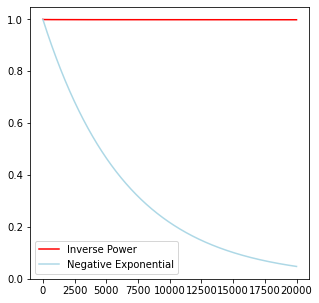

In [63]:
xs = np.arange(1.0, 20000, 5)

# # inverse power
# y_inv_power = np.power(xs, -0.8781)

# # negative exponential
# y_neg_exp = np.exp(-0.8781*xs)

# inverse power
y_inv_power = np.power(xs, -beta)

# negative exponential
y_neg_exp = np.exp(-beta*xs)

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(xs, y_inv_power, label="Inverse Power", color="red")
ax.plot(xs, y_neg_exp, label='Negative Exponential', color="lightblue")
ax.legend()

In [64]:
beta

0.00015316619346392103

## IV.1. Scenario A

50% decrease in jobs in Canary Wharf

In [65]:
curr_jobs_cw = df.loc[df['station_destination'] == 'Canary Wharf', ['jobs']].iloc[0, 0]
curr_jobs_cw

58772

In [66]:
def new_jobs(row):
    if row["station_destination"] == "Canary Wharf":
        val = curr_jobs_cw/2
    else:
        val = row["jobs"]
    return val


df["new_jobs"] = df.apply(new_jobs, axis=1)
df

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,alpha_i,prodsimest1,prodsimest1_power,new_jobs
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,6.395262,11.271478,9.003504,-2.914322,78,55,78549.0
1,Abbey Road,Beckton,1,599,442,8510.121774,6.395262,6.091310,9.049012,-2.914322,1,1,442.0
2,Abbey Road,Blackwall,3,599,665,3775.448872,6.395262,6.499787,8.236275,-2.914322,4,3,665.0
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,6.395262,10.981421,8.534348,-2.914322,99,66,29386.0
4,Abbey Road,Canning Town,37,599,15428,2228.923167,6.395262,9.643939,7.709274,-2.914322,56,49,15428.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61408,Woolwich Arsenal,Tower Gateway,127,7892,3342,13401.795549,8.973605,8.114325,9.503144,0.518041,99,121,3342.0
61409,Woolwich Arsenal,West Ham,608,7892,5487,8701.454361,8.973605,8.610137,9.071245,0.518041,295,259,5487.0
61410,Woolwich Arsenal,West India Quay,6,7892,400,9536.720451,8.973605,5.991465,9.162905,0.518041,36,32,400.0
61411,Woolwich Arsenal,West Silvertown,81,7892,893,5355.248554,8.973605,6.794587,8.585832,0.518041,125,98,893.0


In [67]:
# log new jobs
df["log_new_jobs"] = df["new_jobs"].apply(log_function)

In [68]:
# this is wrong, but just doing it to see
df["prodsimest2"] = np.exp(df["alpha_i"] + gamma*df["log_new_jobs"] - beta*df["distance"])

df["prodsimest2"] = round(df["prodsimest2"])
df["prodsimest2"] = df["prodsimest2"].astype(int)

new_flows_wrong = df.pivot_table(values="prodsimest2", index="station_origin",
                                 columns="station_destination", aggfunc=np.sum, margins=True)
new_flows_wrong

# we can see that total flows in the system decreased, but we want to preserve the original total flows

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,555
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1226
Acton Town,NaN,NaN,NaN,13.0,13.0,NaN,14.0,0.0,NaN,16.0,...,13.0,3.0,2.0,20.0,NaN,0.0,NaN,1.0,NaN,3730
Aldgate,NaN,NaN,1.0,NaN,37.0,NaN,NaN,0.0,NaN,27.0,...,2.0,NaN,2.0,2.0,NaN,1.0,NaN,1.0,NaN,2854
Aldgate East,NaN,NaN,1.0,40.0,NaN,NaN,0.0,0.0,NaN,29.0,...,2.0,0.0,3.0,2.0,NaN,1.0,NaN,1.0,NaN,3117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,1.0,41.0,52.0,NaN,NaN,NaN,NaN,30.0,...,2.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,4765
Woodgrange Park,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,532
Woodside Park,NaN,NaN,2.0,19.0,19.0,NaN,0.0,NaN,NaN,32.0,...,3.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,3083


### Re-calculate alpha_i

In [69]:
# equation (1) is NOT the poisson model, so we don't use the log values
Dj_gamma = df["new_jobs"]**gamma
# dist_beta = df["distance"]**-beta
dist_beta = np.exp(-beta*df['distance'])

# calculate the first stage of the Ai values
# create a temporary variable
df["temp"] = Dj_gamma * dist_beta

# now do the sum over all js bit
A_i = df.groupby(['station_origin']).sum()[['temp']]

A_i.head()

,temp
station_origin,
Abbey Road,10295.858846
Acton Central,3912.653095
Acton Town,18721.715005
Aldgate,54161.673755
Aldgate East,54355.299243


In [70]:
# now divide into 1
A_i["A_i"] = 1/A_i["temp"]
A_i.drop(['temp'], axis=1, inplace=True)

A_i.head()

,A_i
station_origin,
Abbey Road,0.000097
Acton Central,0.000256
Acton Town,0.000053
Aldgate,0.000018
Aldgate East,0.000018


In [71]:
# and write the A_i values back into the dataframe
df = df.merge(A_i, left_on="station_origin", right_index=True, how="left")

# remove "temp" column
df.drop(['temp'], axis=1, inplace=True)

In [72]:
df["scenarioA_est"] = df["A_i"] * df["population"] * Dj_gamma * dist_beta
df["scenarioA_est"] = round(df["scenarioA_est"])
df["scenarioA_est"] = df["scenarioA_est"].astype(int)

In [73]:
# create pivot table
prodsimEst_scenario_A = df.pivot_table(values="scenarioA_est", index="station_origin",
                                       columns="station_destination", aggfunc=np.sum, margins=True)
prodsimEst_scenario_A.fillna(0, inplace=True)
prodsimEst_scenario_A

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,597
Acton Central,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1226
Acton Town,0.0,0.0,0.0,13.0,13.0,0.0,14.0,0.0,0.0,16.0,...,13.0,3.0,2.0,20.0,0.0,0.0,0.0,1.0,0.0,3750
Aldgate,0.0,0.0,1.0,0.0,38.0,0.0,0.0,0.0,0.0,28.0,...,2.0,0.0,3.0,2.0,0.0,1.0,0.0,1.0,0.0,2886
Aldgate East,0.0,0.0,1.0,41.0,0.0,0.0,0.0,0.0,0.0,29.0,...,2.0,0.0,3.0,2.0,0.0,1.0,0.0,1.0,0.0,3167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,0.0,0.0,1.0,42.0,53.0,0.0,0.0,0.0,0.0,31.0,...,2.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,4860
Woodgrange Park,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,532
Woodside Park,0.0,0.0,2.0,19.0,19.0,0.0,0.0,0.0,0.0,32.0,...,3.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3102


In [76]:
# compare with initial model estimates
predicted_flows1

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,595
Acton Central,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1226
Acton Town,0.0,0.0,0.0,13.0,13.0,0.0,14.0,0.0,0.0,16.0,...,13.0,3.0,2.0,20.0,0.0,0.0,0.0,1.0,0.0,3744
Aldgate,0.0,0.0,1.0,0.0,37.0,0.0,0.0,0.0,0.0,27.0,...,2.0,0.0,2.0,2.0,0.0,1.0,0.0,1.0,0.0,2885
Aldgate East,0.0,0.0,1.0,40.0,0.0,0.0,0.0,0.0,0.0,29.0,...,2.0,0.0,3.0,2.0,0.0,1.0,0.0,1.0,0.0,3160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,0.0,0.0,1.0,41.0,52.0,0.0,0.0,0.0,0.0,30.0,...,2.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,4867
Woodgrange Park,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,532
Woodside Park,0.0,0.0,2.0,19.0,19.0,0.0,0.0,0.0,0.0,32.0,...,3.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3100


In [74]:
# compare with observed flows
flow_matrix

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,32,599
Acton Central,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1224
Acton Town,0,0,0,3,17,0,35,0,0,11,...,77,3,6,9,0,0,0,0,0,3745
Aldgate,0,0,0,0,0,0,0,0,0,17,...,0,0,4,8,0,0,0,0,0,2886
Aldgate East,0,0,2,0,0,0,0,0,0,20,...,24,0,0,12,0,1,0,1,0,3172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,0,0,2,5,47,0,0,0,0,22,...,2,0,1,0,0,0,0,0,0,4868
Woodgrange Park,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,530
Woodside Park,0,0,1,26,11,0,0,0,0,59,...,0,0,0,0,0,0,0,0,0,3093


In [75]:
df.loc[df['station_destination'] == 'Canary Wharf'][['station_origin', 'station_destination', 'flows', 'jobs', 'new_jobs', 'prodsimest1', 'prodsimest2', 'scenarioA_est']]

,station_origin,station_destination,flows,jobs,new_jobs,prodsimest1,prodsimest2,scenarioA_est
3,Abbey Road,Canary Wharf,1,58772,29386.0,99,59,63
126,Acton Town,Canary Wharf,57,58772,29386.0,35,21,21
348,Aldgate,Canary Wharf,1,58772,29386.0,77,46,46
595,Aldgate East,Canary Wharf,3,58772,29386.0,105,62,63
817,All Saints,Canary Wharf,67,58772,29386.0,183,108,121
...,...,...,...,...,...,...,...,...
60534,Wood Green,Canary Wharf,64,58772,29386.0,105,62,62
60777,Wood Lane,Canary Wharf,0,58772,29386.0,12,7,7
61001,Woodford,Canary Wharf,192,58772,29386.0,250,148,151
61233,Woodside Park,Canary Wharf,42,58772,29386.0,41,24,25


## IV.2. Scenario B

When beta is large, the effect of distance is greater.

### Doubly-constrained model

In [77]:
dbl_form = 'flows ~ station_origin + station_destination + distance - 1'

doubSim = smf.glm(formula=dbl_form, data=df, family=sm.families.Poisson()).fit()

doubSim.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  flows   No. Observations:                61413
Model:                            GLM   Df Residuals:                    60617
Model Family:                 Poisson   Df Model:                          795
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -8.5105e+05
Date:                Tue, 03 May 2022   Deviance:                   1.5299e+06
Time:                        08:56:41   Pearson chi2:                 2.02e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
station_origin[Abbey Road]                             1.3541      0.068     20.016      0.000       1.222       1.487
station_origin[Acton Central]                          2.9653      0.061     48.422      0.000       2.845       3.085
station_origin[Acton Town]                             2.7807      0.056     49.310      0.000       2.670       2.891
station_origin[Aldgate]                                1.5372      0.057     26.942      0.000       1.425       1.649
station_origin[Aldgate East]                           1.6255      0.057     28.628      0.000       1.514       1.737
station_origin[All Saints]                             1.2836      0.065     19.669      0.000       1.156       1.411
station_origin[Alperton]                               2.7155      0.059     45.686      0.000       2.599       2.832
station_origin[Amersham]                               5.2245      0.063     83.195      0.000       5.101       5.348
station_origin[Anerley]                                3.1015      0.067     46.035      0.000       2.969       3.234
station_origin[Angel]                                  1.8928      0.056     33.738      0.000       1.783       2.003
station_origin[Archway]                                2.7644      0.056     49.749      0.000       2.656       2.873
station_origin[Arnos Grove]                            3.0621      0.057     53.777      0.000       2.950       3.174
station_origin[Arsenal]                                1.5985      0.058     27.522      0.000       1.485       1.712
station_origin[Baker Street]                           2.4709      0.055     44.785      0.000       2.363       2.579
station_origin[Balham]                                 3.5943      0.055     65.458      0.000       3.487       3.702
station_origin[Bank and Monument]                      3.7091      0.054     68.410      0.000       3.603       3.815
station_origin[Barbican]                               0.6391      0.061     10.484      0.000       0.520       0.759
station_origin[Barking]                                3.9247      0.055     71.243      0.000       3.817       4.033
station_origin[Barkingside]                            3.0305      0.061     49.909      0.000       2.911       3.149
station_origin[Barons Court]                           2.3046      0.056     41.012      0.000       2.194       2.415
station_origin[Bayswater]                              1.2314      0.060     20.677      0.000       1.115       1.348
station_origin[Beckton]                                2.6670      0.061     43.608      0.000       2.547       2.787
station_origin[Beckton Park]                           1.0048      0.080     12.635      0.000       0.849  

In [78]:
df["doubsimfitted"] = np.round(doubSim.mu)

In [79]:
print(CalcRSquared(df["flows"], df["doubsimfitted"]))
print(CalcRMSE(df["flows"], df["doubsimfitted"]))

0.49784274146323343
93.401


In [80]:
doubsimfitted = pd.pivot_table(df, values='doubsimfitted', index='station_origin', 
                               columns='station_destination', fill_value=0, aggfunc=sum, margins=True)
doubsimfitted

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,31,603.0
Acton Central,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1221.0
Acton Town,0,0,0,11,10,0,17,0,0,12,...,40,4,2,19,0,0,0,1,0,3752.0
Aldgate,0,0,1,0,32,0,0,0,0,23,...,7,0,3,2,0,1,0,1,0,2883.0
Aldgate East,0,0,2,38,0,0,0,0,0,24,...,7,1,3,2,0,1,0,1,0,3167.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,0,0,2,38,44,0,0,0,0,25,...,7,0,7,0,0,0,0,0,0,4862.0
Woodgrange Park,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,528.0
Woodside Park,0,0,2,17,15,0,0,0,0,25,...,10,0,4,0,0,0,0,0,0,3093.0


In [81]:
# Here is the entropy maximising approach for a known beta.
# Plug in the required values in this function to solve.

def balance_doubly_constrained(pd, orig_field, dest_field, Oi_field, Dj_field, cij_field, beta, 
                               cost_function, Ai_name="Ai_new", Bj_name="Bj_new", converge=0.001):
    # Define some variables
    Oi = pd[[orig_field, Oi_field]]
    Dj = pd[[dest_field, Dj_field]]
    if cost_function.lower() in ['power','pow']:
        beta_cij = np.exp(beta * np.log(pd[cij_field]))
    elif cost_function.lower() in ['exponential','exp']:
        beta_cij = np.exp(beta * pd[cij_field])
    else:
        return "Cost function not specified properly, use 'exp' or 'pow'"

    # Create some helper variables
    cnvg = 1
    iteration = 0
    # Now iteratively rebalance the Ai and Bj terms until convergence
    while cnvg > converge:
        if iteration == 0:
            # This first condition sets starting values for Ai and Bj
            # NB sets starting value of Ai assuming Bj is a vector of 1s.
            # We've already established beta_cij with the appropriate cost function, so...
            Oi = Oi.assign(Ai = Dj[Dj_field] * beta_cij)
            # Aggregate Ai and take inverse
            Ai = 1.0/Oi.groupby(orig_field)['Ai'].sum().to_frame()
            # Merge new Ais
            Oi = Oi.merge(Ai, left_on=orig_field, right_index=True, suffixes=('', '_old'))
            # Drop the temporary Ai field we created, leaving Ai_old
            Oi.drop('Ai', axis=1, inplace=True)

            # Now set up Bjs using starting values of Ai
            Dj = Dj.assign(Bj = Oi['Ai_old'] * Oi[Oi_field] * beta_cij)
            # Aggregate Bj and take inverse
            Bj = 1.0/Dj.groupby(dest_field)['Bj'].sum().to_frame()
            # Merge new Bjs
            Dj = Dj.merge(Bj,left_on = dest_field, right_index = True, suffixes = ('','_old'))
            # Drop the temporary Bj field we created, leaving Bj_old
            Dj.drop('Bj', axis=1, inplace=True)

            # Increment loop
            iteration += 1
        else:
            # This bit is the iterated bit of the loop which refines the values of Ai and Bj
            # First Ai
            Oi['Ai'] = Dj['Bj_old'] * Dj[Dj_field] * beta_cij
            # Aggregate Ai and take inverse
            Ai = 1.0/Oi.groupby(orig_field)['Ai'].sum().to_frame()
            # Drop temporary Ai
            Oi.drop('Ai', axis=1, inplace=True)
            # Merge new Ais 
            Oi = Oi.merge(Ai, left_on = orig_field, right_index = True)
            # Calculate the difference between old and new Ais
            Oi['diff'] = np.absolute((Oi['Ai_old'] - Oi['Ai'])/Oi['Ai_old'])
            # Set new Ais to Ai_old
            Oi['Ai_old'] = Oi['Ai']
            # Drop the temporary Ai field we created, leaving Ai_old
            Oi.drop('Ai', axis=1, inplace=True)
            
            # Then Bj
            Dj['Bj'] = Oi['Ai_old'] * Oi[Oi_field] * beta_cij
            # Aggregate Bj and take inverse
            Bj = 1.0/Dj.groupby(dest_field)['Bj'].sum().to_frame()
            # Drop temporary Bj
            Dj.drop('Bj', axis=1, inplace=True)
            # Merge new Bjs
            Dj = Dj.merge(Bj,left_on = dest_field, right_index = True)
            # Calculate the difference between old and new Bjs
            Dj['diff'] = np.absolute((Dj['Bj_old'] - Dj['Bj'])/Dj['Bj_old'])
            # Set new Bjs to Bj_old
            Dj['Bj_old'] = Dj['Bj']
            # Drop the temporary Bj field we created, leaving Bj_old
            Dj.drop('Bj', axis=1, inplace=True)
            
            # Assign higher sum difference from Ai or Bj to cnvg
            cnvg = np.maximum(Oi['diff'].sum(), Dj['diff'].sum())
            
            # Print and increment loop
            print("Iteration:", iteration)
            iteration += 1

    # When the while loop finishes add the computed Ai_old and Bj_old to the dataframe and return
    pd[Ai_name] = Oi['Ai_old']
    pd[Bj_name] = Dj['Bj_old']
    return pd

In [82]:
# Use the beta we got from the doubly constrained negative exp model
beta = -doubSim.params[-1]

# Get the balancing factors
df = balance_doubly_constrained(df, 'station_origin', 'station_destination',
                                'population', 'jobs', 'distance', -beta, 'exponential')

# Now predict the model again using the new Ai and Dj fields.
df['doubsimest_exp'] = np.round(df['population'] * df['Ai_new'] * df['jobs']
                                * df['Bj_new'] * np.exp(df['distance']*-beta))

pd.pivot_table(df, values='doubsimest_exp', index='station_origin', columns='station_destination',
               fill_value=0, aggfunc=sum, margins=True)

Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Iteration: 21
Iteration: 22
Iteration: 23


station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,31,603.0
Acton Central,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1221.0
Acton Town,0,0,0,11,10,0,17,0,0,12,...,40,4,2,19,0,0,0,1,0,3752.0
Aldgate,0,0,1,0,32,0,0,0,0,23,...,7,0,3,2,0,1,0,1,0,2883.0
Aldgate East,0,0,2,38,0,0,0,0,0,24,...,7,1,3,2,0,1,0,1,0,3167.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,0,0,2,38,44,0,0,0,0,25,...,7,0,7,0,0,0,0,0,0,4862.0
Woodgrange Park,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,528.0
Woodside Park,0,0,2,17,15,0,0,0,0,25,...,10,0,4,0,0,0,0,0,0,3094.0


In [83]:
beta

0.00015436969215488182

In [85]:
beta2 = 0.0005
beta3 = 0.0009

#### beta = 0.0005

In [86]:
# Use the newly selected beta values 
# beta = 0.0005 first

# Get the balancing factors. NB Setting of new field names for Ai and Bj.
df = balance_doubly_constrained(df, 'station_origin', 'station_destination', 
                                'population', 'jobs', 'distance', -beta2, 
                                'exponential', 'Ai_beta2', 'Bj_beta2')

# Now predict the model again using the new Ai and Dj fields.
df['doubsimest_beta2'] = np.round(df['population'] * df['Ai_beta2'] * df['jobs'] 
                                  * df['Bj_beta2'] * np.exp(df['distance']*-beta2))

# Check out the matrix
pd.pivot_table(df, values='doubsimest_beta2', index='station_origin', columns='station_destination',
               fill_value=0, aggfunc=sum, margins=True)

Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Iteration: 21
Iteration: 22
Iteration: 23
Iteration: 24
Iteration: 25
Iteration: 26
Iteration: 27
Iteration: 28
Iteration: 29
Iteration: 30
Iteration: 31
Iteration: 32
Iteration: 33
Iteration: 34
Iteration: 35
Iteration: 36
Iteration: 37
Iteration: 38
Iteration: 39
Iteration: 40
Iteration: 41
Iteration: 42
Iteration: 43
Iteration: 44
Iteration: 45
Iteration: 46
Iteration: 47
Iteration: 48
Iteration: 49
Iteration: 50
Iteration: 51
Iteration: 52
Iteration: 53
Iteration: 54
Iteration: 55
Iteration: 56
Iteration: 57
Iteration: 58
Iteration: 59
Iteration: 60
Iteration: 61
Iteration: 62
Iteration: 63
Iteration: 64
Iteration: 65
Iteration: 66
Iteration: 67
Iteration: 68
Iteration: 69
Iteration: 70
Iteration: 71
Iteration: 72
I

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,13,600.0
Acton Central,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1221.0
Acton Town,0,0,0,1,1,0,3,0,0,1,...,7,0,0,41,0,0,0,0,0,3737.0
Aldgate,0,0,0,0,60,0,0,0,0,25,...,0,0,0,0,0,0,0,0,0,2884.0
Aldgate East,0,0,0,87,0,0,0,0,0,26,...,0,0,0,0,0,0,0,0,0,3164.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,0,0,0,36,59,0,0,0,0,12,...,0,0,0,0,0,0,0,0,0,4866.0
Woodgrange Park,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,527.0
Woodside Park,0,0,0,6,4,0,0,0,0,25,...,0,0,0,0,0,0,0,0,0,3089.0


In [87]:
doubsimfitted

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,31,603.0
Acton Central,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1221.0
Acton Town,0,0,0,11,10,0,17,0,0,12,...,40,4,2,19,0,0,0,1,0,3752.0
Aldgate,0,0,1,0,32,0,0,0,0,23,...,7,0,3,2,0,1,0,1,0,2883.0
Aldgate East,0,0,2,38,0,0,0,0,0,24,...,7,1,3,2,0,1,0,1,0,3167.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,0,0,2,38,44,0,0,0,0,25,...,7,0,7,0,0,0,0,0,0,4862.0
Woodgrange Park,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,528.0
Woodside Park,0,0,2,17,15,0,0,0,0,25,...,10,0,4,0,0,0,0,0,0,3093.0


In [89]:
flow_matrix

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,32,599
Acton Central,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1224
Acton Town,0,0,0,3,17,0,35,0,0,11,...,77,3,6,9,0,0,0,0,0,3745
Aldgate,0,0,0,0,0,0,0,0,0,17,...,0,0,4,8,0,0,0,0,0,2886
Aldgate East,0,0,2,0,0,0,0,0,0,20,...,24,0,0,12,0,1,0,1,0,3172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,0,0,2,5,47,0,0,0,0,22,...,2,0,1,0,0,0,0,0,0,4868
Woodgrange Park,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,530
Woodside Park,0,0,1,26,11,0,0,0,0,59,...,0,0,0,0,0,0,0,0,0,3093


#### beta = 0.0009

In [88]:
# Get the balancing factors. NB Setting of new field names for Ai and Bj.
df = balance_doubly_constrained(df, 'station_origin', 'station_destination', 
                                'population', 'jobs', 'distance', -beta3, 
                                'exponential', 'Ai_beta3', 'Bj_beta3')

# Now predict the model again using the new Ai and Dj fields.
df['doubsimest_beta3'] = np.round(df['population'] * df['Ai_beta3'] * df['jobs'] 
                                  * df['Bj_beta3'] * np.exp(df['distance']*-beta3))

# Check out the matrix
pd.pivot_table(df, values='doubsimest_beta3', index='station_origin', columns='station_destination',
               fill_value=0, aggfunc=sum, margins=True)

Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Iteration: 21
Iteration: 22
Iteration: 23
Iteration: 24
Iteration: 25
Iteration: 26
Iteration: 27
Iteration: 28
Iteration: 29
Iteration: 30
Iteration: 31
Iteration: 32
Iteration: 33
Iteration: 34
Iteration: 35
Iteration: 36
Iteration: 37
Iteration: 38
Iteration: 39
Iteration: 40
Iteration: 41
Iteration: 42
Iteration: 43
Iteration: 44
Iteration: 45
Iteration: 46
Iteration: 47
Iteration: 48
Iteration: 49
Iteration: 50
Iteration: 51
Iteration: 52
Iteration: 53
Iteration: 54
Iteration: 55
Iteration: 56
Iteration: 57
Iteration: 58
Iteration: 59
Iteration: 60
Iteration: 61
Iteration: 62
Iteration: 63
Iteration: 64
Iteration: 65
Iteration: 66
Iteration: 67
Iteration: 68
Iteration: 69
Iteration: 70
Iteration: 71
Iteration: 72
I

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,598.0
Acton Central,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1224.0
Acton Town,0,0,0,0,0,0,0,0,0,0,...,0,0,0,41,0,0,0,0,0,3746.0
Aldgate,0,0,0,0,56,0,0,0,0,14,...,0,0,0,0,0,0,0,0,0,2882.0
Aldgate East,0,0,0,124,0,0,0,0,0,15,...,0,0,0,0,0,0,0,0,0,3169.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,0,0,0,34,72,0,0,0,0,5,...,0,0,0,0,0,0,0,0,0,4864.0
Woodgrange Park,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,530.0
Woodside Park,0,0,0,2,1,0,0,0,0,25,...,0,0,0,0,0,0,0,0,0,3092.0


## IV.3. Analysis

Why I use correlation coefficient and RMSE: 

* if the observed and estimated flows are close, RMSE will be lower
* higher correlation coefficient indicates stronger correlation between observed and predicted values
* a scenario with a greater impact on the redistribution of flows will deviate more from the observed values

In [90]:
results = {}

results['scenarioA'] = (scipy.stats.pearsonr(df["flows"], df["scenarioA_est"])[0],
                        CalcRMSE(df["flows"], df["scenarioA_est"]))

results['scenarioB1'] = (scipy.stats.pearsonr(df["flows"], df["doubsimest_beta2"])[0], 
                        CalcRMSE(df["flows"], df["doubsimest_beta2"]))

results['scenarioB2'] = (scipy.stats.pearsonr(df["flows"], df["doubsimest_beta3"])[0], 
                        CalcRMSE(df["flows"], df["doubsimest_beta3"]))

In [91]:
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['r', 'RMSE'])
results_df

,r,RMSE
scenarioA,0.672109,97.682
scenarioB1,0.601234,119.954
scenarioB2,0.503386,158.463


array([<AxesSubplot:title={'center':'r'}>,
       <AxesSubplot:title={'center':'RMSE'}>], dtype=object)

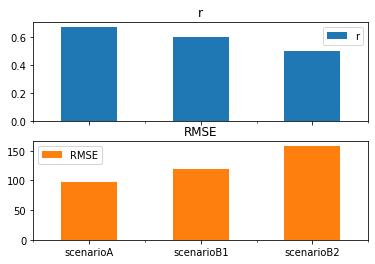

In [92]:
results_df.plot.bar(rot=0, subplots=True)

<AxesSubplot:>

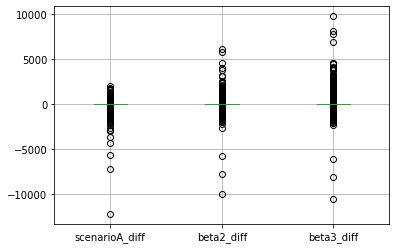

In [93]:
df['scenarioA_diff'] = df['scenarioA_est'] - df['flows']

df['beta2_diff'] = df['doubsimest_beta2'] - df['flows']

df['beta3_diff'] = df['doubsimest_beta3'] - df['flows']

df.boxplot(column=['scenarioA_diff', 'beta2_diff', 'beta3_diff'])